<a href="https://colab.research.google.com/github/sunnyyashu178/DataScience-Projects/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml("mnist_784")

In [4]:
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [5]:
X,y = mnist["data"], mnist["target"]

In [6]:
mnist["DESCR"]

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [7]:
X.shape

(70000, 784)

In [8]:
y = y.astype(int)

There are 70,000 images, and each image has 784 features. This is because each image
is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0
(white) to 255 (black)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

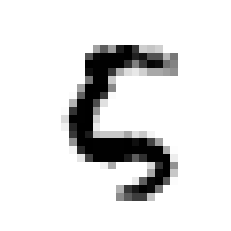

In [10]:
plt.imshow(X[2000].reshape(28,28),cmap=plt.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [11]:
y[2000]

5

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Let’s also shuffle the training set; this will guarantee that all cross-validation folds will
be similar (you don’t want one fold to be missing some digits). Moreover, some learn‐
ing algorithms are sensitive to the order of the training instances, and they perform
poorly if they get many similar instances in a row. Shuffling the dataset ensures that
this won’t happen:

In [13]:
import numpy as np

In [14]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [15]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [16]:
from sklearn.linear_model import SGDClassifier

In [17]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
some_digit = X[0]
sgd_clf.predict([some_digit])

array([ True])

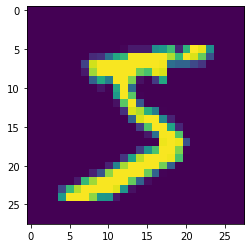

In [19]:
plt.imshow(X[0].reshape(28,28))

In [20]:
y

array([5, 0, 4, ..., 4, 5, 6])

In [21]:
y[0]

5

# Cross-validation

In [22]:
from sklearn.model_selection import StratifiedKFold

In [23]:
from sklearn.base import clone # clone is used for deep copy

In [24]:
skfolds = StratifiedKFold(n_splits=3,random_state=42)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [25]:
for train_index,test_index in skfolds.split(X_train,y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = (y_train_5[train_index])
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds,y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct/len(y_pred))

0.96365
0.9698
0.957


In [26]:
# 2nd method 
from sklearn.model_selection import cross_val_score

In [27]:
scores = cross_val_score(sgd_clf,X_train,y_train_5,
                        scoring="accuracy",cv=3)
scores

array([0.96365, 0.9698 , 0.957  ])

In [28]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [29]:
from sklearn.base import BaseEstimator

In [30]:
class Never5Classifier(BaseEstimator):
  def fit(self,X,y=None):
    pass
  def predict(self,X):
    return np.zeros((len(X),1), dtype=bool)

In [31]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.90835, 0.90885, 0.91175])

In [32]:
from sklearn.model_selection import cross_val_predict

In [33]:
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)
y_train_pred

array([False,  True, False, ..., False, False, False])

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_train_5,y_train_pred)

array([[54077,   502],
       [ 1689,  3732]])

In [36]:
from sklearn.metrics import precision_score,recall_score

In [37]:
precision_score(y_train_5,y_train_pred)

0.8814359943316014

In [38]:
recall_score(y_train_5,y_train_pred)

0.6884338682899834

In [39]:
from sklearn.metrics import f1_score

In [40]:
f1_score(y_train_5,y_train_pred)

0.7730709476954947

In [41]:
some_digit = X[0]
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([3186.90064367])

In [42]:
threshold = 0
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([ True])

In [43]:
threshold = 1000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([ True])

In [44]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,
                             method="decision_function")

In [45]:
y_scores

array([-18203.40516459,   5447.43147766, -57490.86045805, ...,
        -3055.96310471, -11427.30374966, -28946.98936941])

In [46]:
from sklearn.metrics import precision_recall_curve

In [47]:
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

In [48]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds,precisions[:-1],"b--",label="precision")
  plt.plot(thresholds,recalls[:-1],"g-",label="recall")
  plt.xlabel("Threshold")
  plt.legend(loc="center left")
  plt.xlim([-60000,60000])
  plt.ylim([0,1])

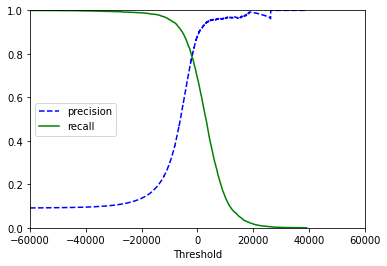

In [49]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


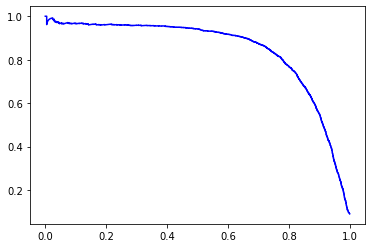

In [50]:
plt.plot(recalls,precisions,"b-")

In [51]:
y_train_pred_90 = (y_scores>600)

In [52]:
precision_score(y_train_5,y_train_pred_90)

0.8998735777496839

In [53]:
recall_score(y_train_5,y_train_pred_90)

0.6565209370964766

In [54]:
confusion_matrix(y_train_5,y_train_pred_90)

array([[54183,   396],
       [ 1862,  3559]])

# The ROC Curve

 ROC curve plots sensitivity (recall or TPR) versus
1 – specificity (also called FPR)

In [55]:
from sklearn.metrics import  roc_curve

In [56]:
fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

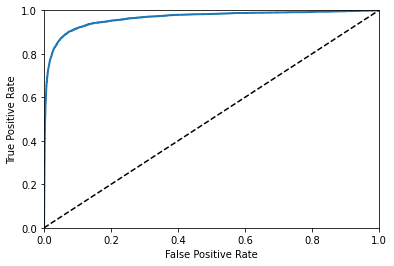

In [57]:
def plot_roc_curve(fpr,tpr,label=None):
  plt.plot(fpr,tpr,linewidth=2,label=label)
  plt.plot([0,1],[0,1],"k--")
  plt.axis([0,1,0,1])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")

plot_roc_curve(fpr,tpr)

In [58]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9642918934622162

# Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,
                                    method="predict_proba")

But to plot a ROC curve, you need scores, not probabilities. A simple solution is to
use the positive class’s probability as the score:

In [61]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

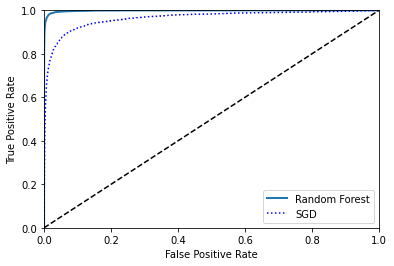

In [62]:
plot_roc_curve(fpr_forest, tpr_forest,"Random Forest")
plt.plot(fpr,tpr,"b:",label="SGD")
plt.legend(loc="lower right")
plt.show()

# Multiclass Classification

In [63]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([3])

In [64]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-15022.96112077, -34924.95703742,  -5400.09121506,
          3820.19558771, -19576.05674292,  -1999.82322465,
        -15933.96893889, -11254.34969172,  -7530.07679453,
         -7381.22323325]])

In [65]:
np.argmax(some_digit_scores)

3

In [66]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [67]:
sgd_clf.classes_[5]

5

# OneVsOneClassifier

In [68]:
from sklearn.multiclass import OneVsOneClassifier

In [69]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5])

In [70]:
len(ovo_clf.estimators_)

45

This time Scikit-Learn did not have to run OvA or OvO because Random Forest
classifiers can directly classify instances into multiple classes. You can call
predict_proba() to get the list of probabilities that the classifier assigned to each
instance for each class:

In [71]:
forest_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [72]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.  , 0.05, 0.  , 0.91, 0.  , 0.01, 0.02, 0.01]])

 Let’s evaluate the SGDClassifier’s accuracy using the cross_val_score()

In [73]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.87275, 0.8845 , 0.8553 ])

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.9002 , 0.90575, 0.89765])

In [75]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [76]:
conf_mx

array([[5597,    0,   16,    8,    8,   39,   32,    5,  218,    0],
       [   0, 6417,   40,   22,    3,   42,    6,    7,  196,    9],
       [  25,   26, 5257,   90,   72,   24,   65,   37,  353,    9],
       [  30,   20,  105, 5263,    1,  195,   27,   43,  380,   67],
       [  10,   15,   42,   10, 5224,    9,   36,   15,  310,  171],
       [  31,   17,   30,  161,   54, 4449,   82,   19,  511,   67],
       [  29,   19,   49,    4,   42,   83, 5550,    6,  136,    0],
       [  20,   11,   46,   20,   48,   10,    5, 5728,  166,  211],
       [  15,   60,   42,   90,    3,  120,   28,    9, 5443,   41],
       [  20,   25,   32,   62,  120,   33,    1,  178,  334, 5144]])

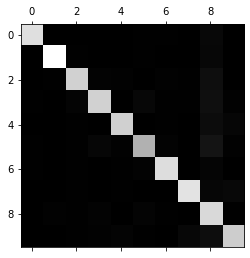

In [77]:
plt.matshow(conf_mx,cmap=plt.cm.gray)

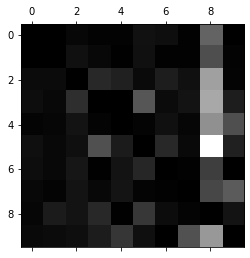

In [78]:
row_sum = conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx/row_sum

np.fill_diagonal(norm_conf_mx, 0)

plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [84]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

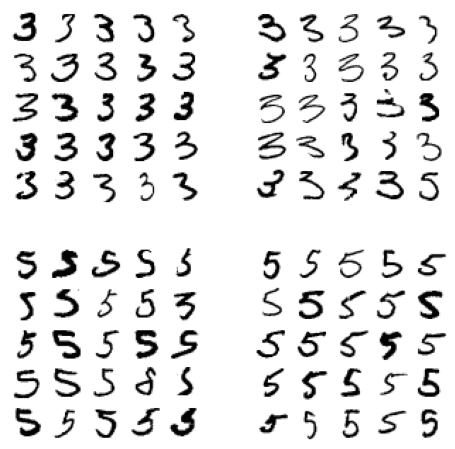

In [87]:
import matplotlib
cl_a, cl_b = 3,5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25],images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25],images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25],images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25],images_per_row=5)
plt.show()

# MultiLabel Classification

In [86]:
y_large = (y_train >= 7 )
y_train_odd = (y_train%2 == 1)
y_multilabel = np.c_[y_large,y_train_odd]

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train,y_multilabel)
knn.predict([some_digit])

array([[False,  True]])